# Chapter 1 - Introduction

Machine learning and pattern recognition deals with developing set of methods that can automatically discover patterns in data and then use these patterns to predict future data.

Major components of building such a machine learning model are
1. _Training Data_ which consists of feature vectors representative of the phenomenon we are interested in and their corresponding label if it is a classification task.
2. _Adaptive Model_ whose parameters are tuned using the training data.
3. _Test Data_ which has similar properties to training data but not used for tuning the adaptive model. So quality of the model is measured on how well it performs on unseen data. This is called _Generalization_.

The central idea is to _capture_ the underlying function which generated training data by tuning the parameters of adaptive model such that it can replicate test data too.

Consider an example in which we are presented with a vector __X__ generated by $sin(2 \pi x)$ but the observed final data __t__ is corrupted by noise. So our goal is to discover the underlying function of $sin(2\pi x)$ and associated noise so that we can predict correct values of __t__ for future values of x.

In [6]:
# Imports
import numpy as np
import scipy
import matplotlib.pyplot as plt

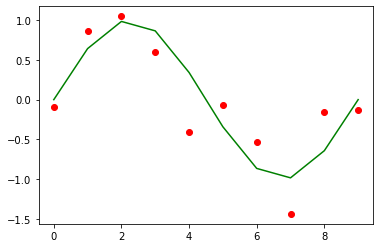

In [44]:
# Data generation 
def gen_data(num_points=25):
    x_points = np.linspace(0, 1, num_points)
    x = np.sin(2 * np.pi*x_points)
    np.random.seed(6)
    noise = np.random.normal(loc=0.0, scale=0.3, size=num_points)
    t = x + noise
    return x, t
num_train_points = 10
num_test_points = 5
x_train, t_train = gen_data(num_train_points)
x_test, t_test = gen_data(num_test_points) 
plt.plot(x_train, c='green')
plt.scatter([i for i in range(len(t_train))], t_train, c='red')

In the plot above, green curve is the data generated by underlying function while red points is the corrupted output seen. To discover the underlying function with the given training data __X__ let us consider an adaptive model given by

$y(x, w) = \sum_{j=0}^M w_j x^j = w_0 + w_1 x + w_2 x^2 + ... w_M x ^M$

where w are the parameters we are tuning. This is called a __Linear Model__ because all the parameters are linear. These parameters can be found out by fitting the above model to the training data X and t we generated above. This can be done by taking help of an __error function__ which represents the degree of misfit between training data and y(x, w). For our case let us consider mean square error given by

$E(w) = 0.5 * \sum_{n=1}^N(y(x_n, w) - t_n)^2$.

In an ideal case we would want the values of w to be such that E(w) is zero. We can find the values of w by curve-fitting in this case (because the number of points are less).

In the code below, _np.polyfit_ does curve fitting by minimizing the mean squared error. Later we build y(x, w) using _np.poly1d_

<ipython-input-45-f3d2b39a00db>:12: RankWarning: Polyfit may be poorly conditioned
  w, model = fit_data(x_train, t_train, m)


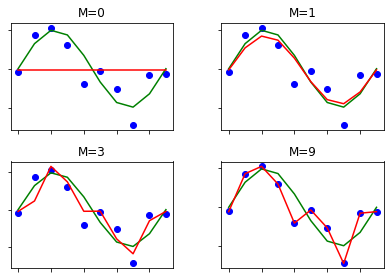

In [45]:
# Fitting data
def fit_data(x, t, M=0):
    w = np.polyfit(x, t, M)
    model = np.poly1d(w)
    return w, model

# Fitting data for different values of M
model_list = []
w_list = []
num_models = 10
for m in range(num_models):
    w, model = fit_data(x_train, t_train, m)
    w_list.append(w)
    model_list.append(model)

# Try different models on training data
t_pred = []
for i, model in enumerate(model_list):
    t_pred.append(model(x_train))

# Now plot the model output and training data target to observe fidelity
fig, axs = plt.subplots(2,2)
fig.tight_layout()
# M = 0
axs[0, 0].title.set_text("M=0")
axs[0, 0].plot(x_train, c='green')
axs[0, 0].plot(t_pred[0], c='red')
axs[0, 0].scatter([i for i in range(num_train_points)], t_train, c='blue')
axs[0, 0].set_xticklabels([])
axs[0, 0].set_yticklabels([])
# M = 1
axs[0, 1].title.set_text("M=1")
axs[0, 1].plot(x_train, c='green')
axs[0, 1].plot(t_pred[1], c='red')
axs[0, 1].scatter([i for i in range(num_train_points)], t_train, c='blue')
axs[0, 1].set_xticklabels([])
axs[0, 1].set_yticklabels([])
# M = 3
axs[1, 0].title.set_text("M=3")
axs[1, 0].plot(x_train, c='green')
axs[1, 0].plot(t_pred[3], c='red')
axs[1, 0].scatter([i for i in range(num_train_points)], t_train, c='blue')
axs[1, 0].set_xticklabels([])
axs[1, 0].set_yticklabels([])
# M = 9
axs[1, 1].title.set_text("M=9")
axs[1, 1].plot(x_train, c='green')
axs[1, 1].plot(t_pred[9], c='red')
axs[1, 1].scatter([i for i in range(num_train_points)], t_train, c='blue')
t = axs[1, 1].set_xticklabels([])
t = axs[1, 1].set_yticklabels([])

We observe that disparity between training data and predicted data decreases as the model size, M increases i.e., the number of parameters used to fit the curve are increasing. Now let us test these models on test data and plot error on training data vs error on test data to understand using higher number of parameters is a good idea. We will use the notion of Root mean square error given by

$E_{RMS} = \sqrt{2E(w^*)/N}$

where N is the size of data set which can differ for training vs test.

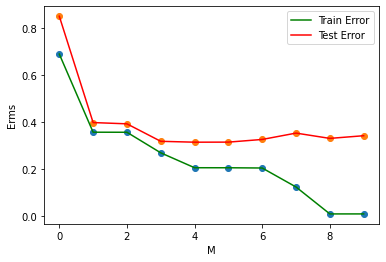

In [46]:
# Calculate error on training data for different model sizes
train_error_list = []
test_error_list = []
def calc_rms_error(x, t, model, num_data_points):
    error_mse = np.sum((model(x) - t) ** 2) / 2
    error_rms = np.sqrt(2 * error_mse / num_data_points)
    return error_rms
for model in model_list:
    train_error_rms = calc_rms_error(x_train, t_train, model, num_train_points)
    train_error_list.append(train_error_rms)
    test_error_rms = calc_rms_error(x_test, t_test, model, num_test_points)
    test_error_list.append(test_error_rms)
plt.plot(train_error_list, c='green', label='Train Error')
plt.scatter([i for i in range(num_models)], train_error_list)
plt.plot(test_error_list, c='red', label='Test Error')
plt.scatter([i for i in range(num_models)], test_error_list)
plt.xlabel("M")
plt.ylabel("Erms")
t = plt.legend(loc="upper right")

As the model size increases we see that training error decreases but at the same time test error increases which shows that this model can perform well only on training data which is not very useful. This is happening because model is too _well tuned_ to all the points in training data. This is called __overfitting__. This problem will disappear if we have more data but that is not always possible. When we see the values of parameters in larger models we can observe that parameter values tend to very large in order to fit the data _tightly_. From the above below we can observe that from M=7 parameter values were high and the gap between training error and test error has widened. To fix this problem we can penalize parameters which are large to reduce the error gap. This is called __Regularization__. 

In [48]:
for i, w in enumerate(w_list):
    print("Model M = " + str(i))
    print(w)

Model M = 0
[-0.03045636]
Model M = 1
[ 0.88019329 -0.03045636]
Model M = 2
[ 0.0366875   0.88019329 -0.04696573]
Model M = 3
[ 1.39539402  0.0366875  -0.16635222 -0.04696573]
Model M = 4
[-1.91580475  1.39539402  1.87266706 -0.16635222 -0.22657243]
Model M = 5
[-0.18035891 -1.91580475  1.62084265  1.87266706 -0.22271438 -0.22657243]
Model M = 6
[-0.91894015 -0.18035891 -0.57021381  1.62084265  1.39678734 -0.22271438
 -0.20811158]
Model M = 7
[ 15.51399397  -0.91894015 -27.32984835  -0.57021381  15.19558737
   1.39678734  -1.91955747  -0.20811158]
Model M = 8
[ 22.0410282   15.51399397 -44.31221442 -27.32984835  25.7757027
  15.19558737  -3.51078535  -1.91955747  -0.11125159]
Model M = 9
[ 10.37764432  22.0410282   -7.83570575 -44.31221442  -9.81757356
  25.7757027   10.3310666   -3.51078535  -1.55471841  -0.11125159]


## 1.2 Probability Theory
